In [6]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target



# Check for missing values
print(df.isnull().sum())


# Split into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Metrics:")
print("Mean Squared Error:", lr_mse)
print("R2 Score:", lr_r2)

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
Linear Regression Metrics:
Mean Squared Error: 0.5558915986952442
R2 Score: 0.575787706032451


Epoch 1/10
516/516 [==============================] - 4s 6ms/step - loss: 0.6625
Epoch 2/10
516/516 [==============================] - 3s 5ms/step - loss: 0.3922
Epoch 3/10
516/516 [==============================] - 2s 4ms/step - loss: 0.3501
Epoch 4/10
516/516 [==============================] - 5s 10ms/step - loss: 0.3398
Epoch 5/10
516/516 [==============================] - 2s 4ms/step - loss: 0.3401
Epoch 6/10
516/516 [==============================] - 1s 2ms/step - loss: 0.3150
Epoch 7/10
516/516 [==============================] - 1s 2ms/step - loss: 0.3033
Epoch 8/10
516/516 [==============================] - 1s 2ms/step - loss: 0.3108
Epoch 9/10
516/516 [==============================] - 1s 2ms/step - loss: 0.2946
Epoch 10/10
129/129 [==============================] - 0s 1ms/step
ANN - Mean Squared Error: 0.29742224354176844
ANN - R2 Score: 0.7730309785109762


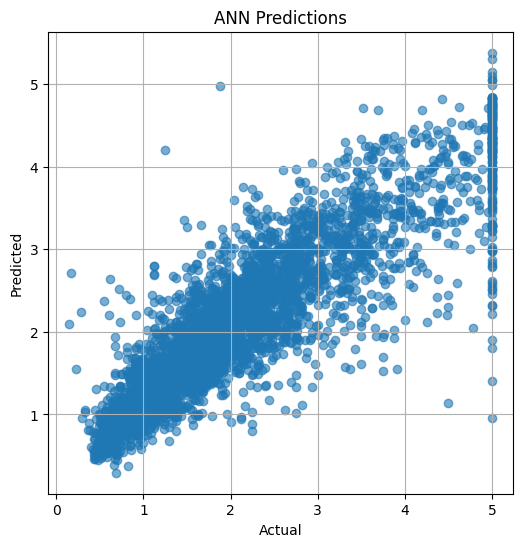

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the ANN Model
ann_model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the ANN
ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Making predictions with the ANN
y_pred_ann = ann_model.predict(X_test_scaled).flatten()

# Evaluating the ANN Model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

# Print the evaluation metrics
print("ANN - Mean Squared Error:", mse_ann)
print("ANN - R2 Score:", r2_ann)

# Plotting the results
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ANN Predictions')
plt.grid(True)
plt.show()

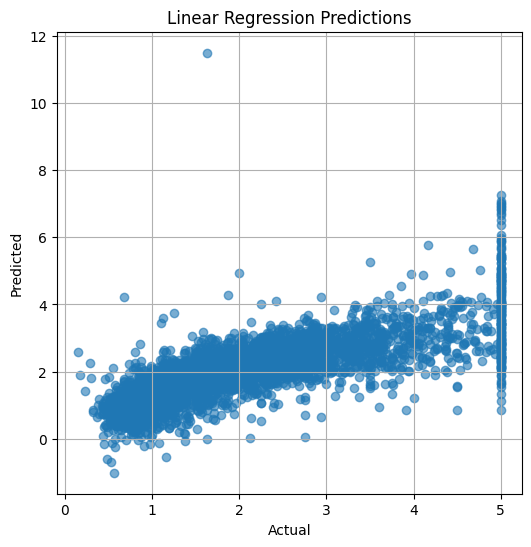

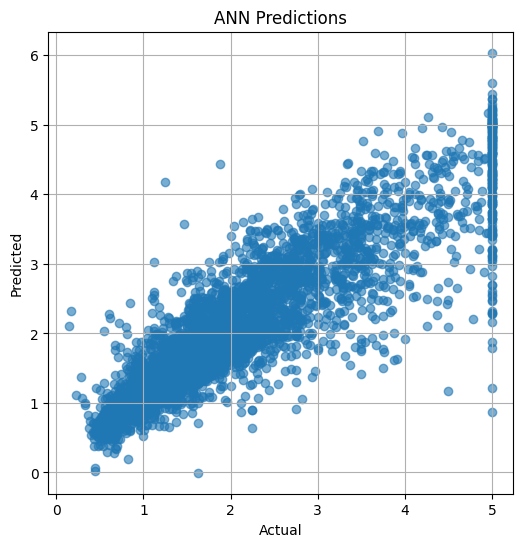

In [5]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression Predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions')
plt.grid(True)
plt.savefig('linear_regression_predictions.png')  # Save the plot

# Scatter plot for ANN Predictions
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_ann, alpha=0.6)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ANN Predictions')
plt.grid(True)
plt.savefig('ann_predictions.png')  # Save the plot
